True
My program took 0.05033302307128906 to run


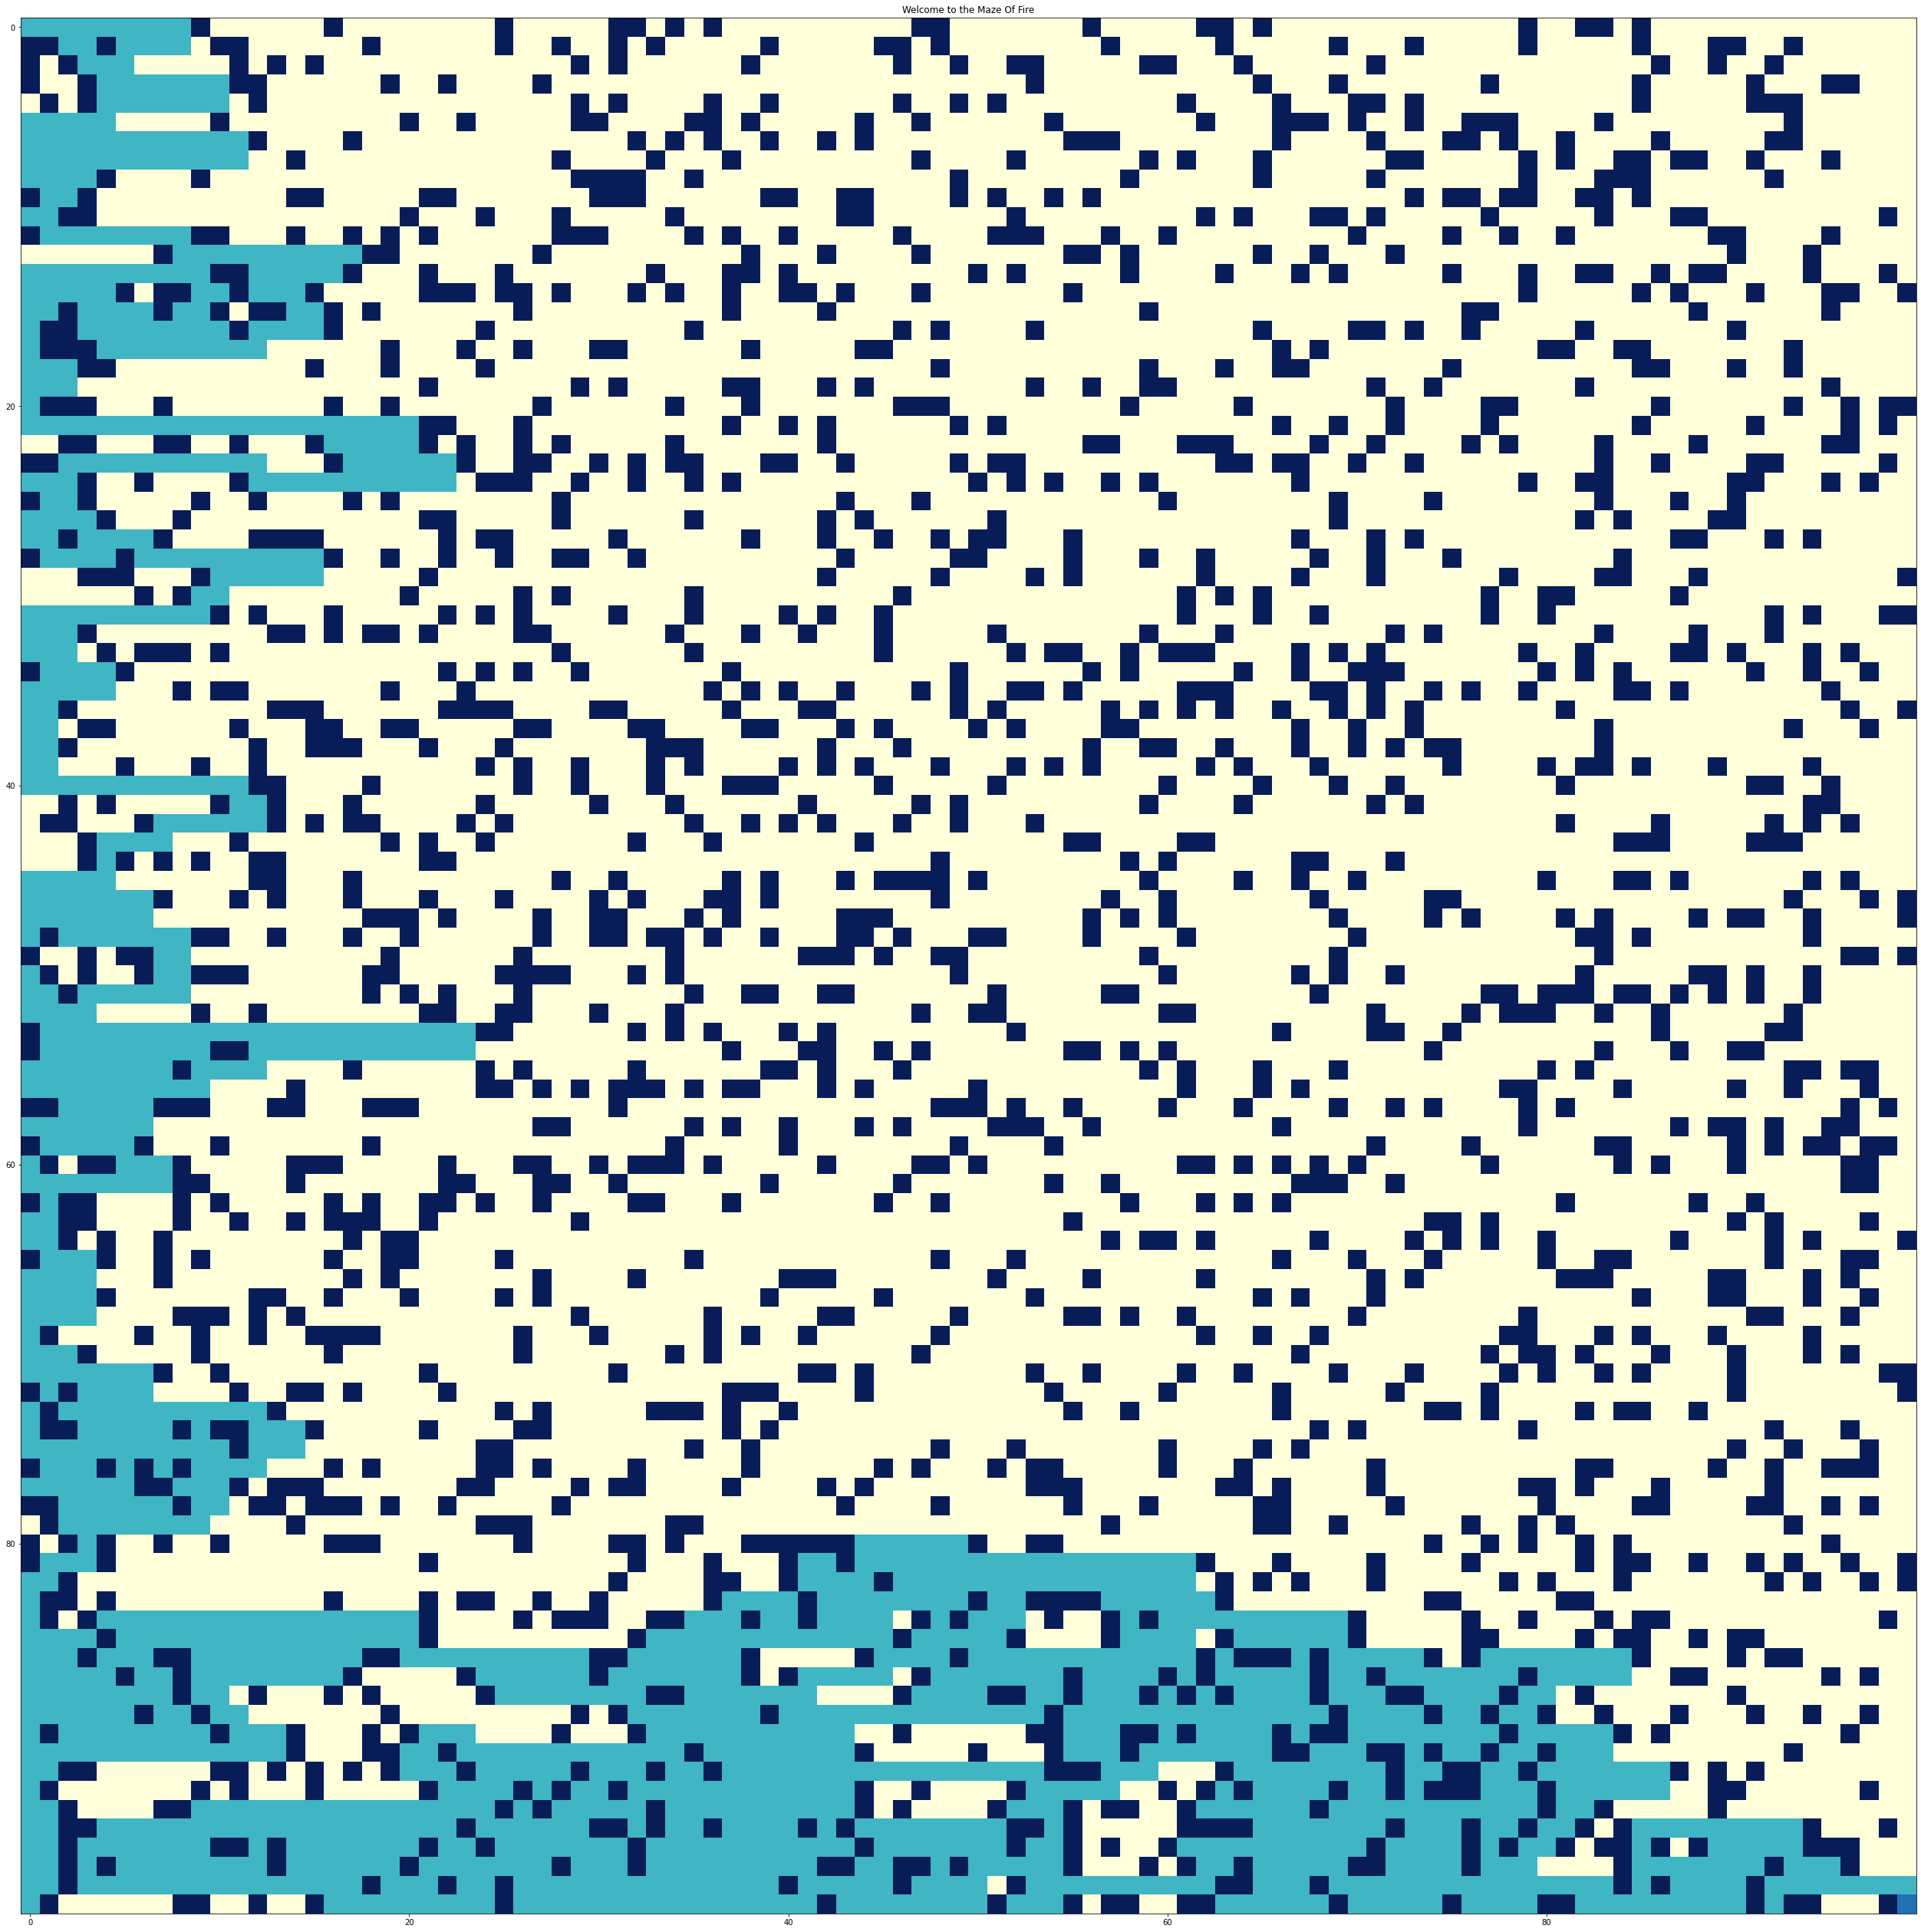

In [1]:
import matplotlib.pyplot as plt
from collections import deque
import random
import time
from queue import PriorityQueue
import numpy as np
from numpy.linalg import norm
start_time = time.time()

dim = 100 #Dimensions of the maze
p = 0.2 #Probability of cell being occupied

OBSTACLE_VALUE = 1
START_AND_END_POINT_VALUE = 0.2
DFS_VISITED_VALUE = 0.5
END_POINT_VALUE = 0.7

#Generating Maze by inputting values randomly
def maze_generator(dim, p):
    maze = []
    for i in range(dim):
        maze.append([])
        for j in range(dim):
            value = random.random() <= p # can either be 0 or 1
            maze[i].append(value)
    maze[0][0] = START_AND_END_POINT_VALUE #Start Point
    maze[-1][-1] = START_AND_END_POINT_VALUE # End Point
    return maze

#Initializes the maze with randomized values
maze = maze_generator(dim,p)

def dfs_search(start, goal):
    # initialize fringe queue and closed set array
    fringe = deque()
    closed_set = []
    # append start to the fringe
    fringe.append(start)
    while fringe:
        current = fringe.pop()
        # There is a valid path to the goal
        if current == goal:
            maze[-1][-1] = END_POINT_VALUE
            return True
        else:
            # check if current has already been visited
            if maze[current[0]][current[1]] != DFS_VISITED_VALUE:
                generate_valid_children_D(current, fringe)
                # mark the coordinate as visited
                maze[current[0]][current[1]] = DFS_VISITED_VALUE
                closed_set.append(current)
    return False

def generate_valid_children_D(current, fringe):
    row_direction = [-1, 1, 0, 0] #(north, south, east, west) {check the row above, check the row below, 0, 0}
    col_direction = [0, 0, 1, -1]# {0, 0, Check the column to the right, check the column to the left}

    # loop through every possible coordinate
    for i in range(0,4):
        row = current[0] + row_direction[i]
        col = current[1] + col_direction[i]

        # if the row coordinate is out of bounds, it cannot be added to the fringe
        if row in range(0, dim):
            # if the col coordinate is out of bounds, it cannot be added to the fringe
            if(col in range(0,dim)):
                # Check if the (row, col) coordinate is a obstacle
                if(maze[row][col] != OBSTACLE_VALUE):
                    # Add to the fringe if it is a valid coordinate and not an obstacle
                    if(maze[row][col] != DFS_VISITED_VALUE):
                        # Check if the coordinates are already visited
                        fringe.append((row,col))


start_D = (0,0)
goal_D = (dim-1, dim-1)
print(dfs_search(start_D, goal_D))

#creating the size of the figure as well as the size of each individual square in the grid
Grid = plt.figure(figsize=(dim,dim)).add_subplot(224) 
Grid.set_title('Welcome to the Maze Of Fire')

#Display the data as an image
Image = plt.imshow(maze)

#Colormap of the generated grid ranging from yellow to blue
#Yellow equals free space (0)
#Dark Blue equals unavailable Space(1)
Image.set_cmap('YlGnBu')

print("My program took", time.time() - start_time, "to run")